# Coffee Exploration With LJ, Reed, and Eric

> Caffeine is the world's most widely consumed psychoactive substance, but unlike many other psychoactive substances it is legal and unregulated in nearly all jurisdictions. In North America, 90% of adults consume caffeine daily. The U.S. Food and Drug Administration lists caffeine as a "Multiple Purpose Generally Recognized as Safe Food Substance." 
- Wikipedia - Mark Goadrich

Sources: 
[1]https://authoritynutrition.com/how-much-coffee-should-you-drink/

[2]http://coffeeandhealth.org/topic-overview/caffeine-in-the-body/

Important Data we found:

8oz cup of coffee has around 100mg of caffeine 

1.6 cups of coffee a day, is the average

200mg absorption into the blood stream is complete around 45 min after intake [2]

the half-life of caffeine is about 4 hours


## The 1 Compartment model, Normal Consumption

The one compartment model in the assignment can actually be thought of as a 3 compartment model:

<img src="images/coffee/diag1Comp.png">

In this diagram, both our source and sink are technically compartments. 

### Designing the method to display the data:

We need to figure out a function to model our simulation. We need to make a few assumptions to get started.

    1. We are assuming that the person drinks coffee at the same time every day 8 am and 10 am. 
    2. The absorption of the caffeine in the coffee is instantaneous and complete (No caffeine is wasted)

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)


We can calculate the amount of caffeine left in the system through the half life equation. Found here: http://www.allmathwords.org/en/h/halflife.html

[ 16.81912022]


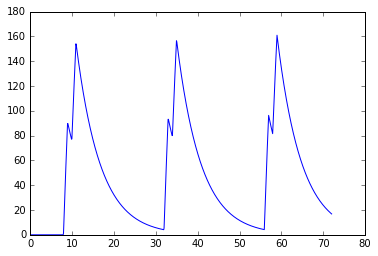

In [3]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = 72 ## In hours
oldTmod8 = -1
currentDay = 1
def caffeineAmount(cups):
    return cups * 100
coffee0 =  0

def eightAM(t):
    if (math.floor(t) % 24 == 8):
        return caffeineAmount(1)
    if (math.floor(t) % 24 == 10):
        return caffeineAmount(1)
    return 0
    
def coffee(u,t):
    cof = u[0]
    dcof = eightAM(t) - cof * decayR 
    return [dcof]

init = [coffee0]
xs = np.linspace(0, totalTime, 900)
ys = rk4(coffee, init, xs)
print(ys[-1])
plt.plot(xs, ys)

1 Compartment Normal Intake
So our average cups of coffee for a normal american is 1.6 cups of coffee a day, we have setup the model so that they consume 2 cups per day. And the average mg of caffeine for a cup is 100mg. So at 8am and 10am each day, a cup is added instantaneously into the bloodstream. The caffeine per cup is multiplied by the cups and that is the amount of caffeine in the bloodstream. So there is a massive spike of caffeine at 8 and 10 am, and then it begins to decay with its half life of 4 hours. The amount of caffeine never reaches 0 by the time the next cup has been consumed. So each day, there is a little more caffeine in the blood stream by the end of the day.

The x-axis shows the number of hours that have passed. So over a 3 day interval (72 hours) there should be 6 intakes at 8 and 10am each day. The y-axis is the mg of caffeine in the system. 



## One Compartment Excessive Model
<img src="images/coffee/diag1Comp.png">

[ 40.6056335]


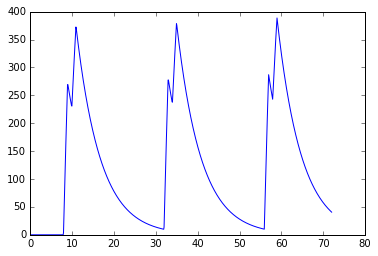

In [4]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = 72 ## In hours
oldTmod8 = -1
currentDay = 1
def caffeineAmount(cups):
    return cups * 100
coffee0 =  0

def eightAM(t):
    if (math.floor(t) % 24 == 8):
        return caffeineAmount(3)
    if (math.floor(t) % 24 == 10):
        return caffeineAmount(2)
    return 0
    
def coffee1a(u,t):
    cof = u[0]
    dcof = eightAM(t) - cof * decayR 
    return [dcof]

init = [coffee0]
xs = np.linspace(0, totalTime, 900)
ys = rk4(coffee1a, init, xs)
print(ys[-1])
plt.plot(xs, ys)

This graph is roughly the same as the normal intake, but with 5 cups of coffee. The caffeine amount cup is the same, and the half life is the same. You can also see the step up of caffeine each day because it doesn’t ever completely leave the blood stream. 


The x-axis shows the number of hours that have passed. So over a 3 day interval (72 hours) there should be 6 intakes at 8 and 10am each day. The y-axis is the mg of caffeine in the system.

No equilibrium seems to be reached in our model. The amount of caffeine before it is consumed again gets higher but there doesn’t seem to be a stop to that. 


# Two Copartment Model
<img src="images/coffee/diag2Comp2.png">

[  5.53084370e-02   9.99446916e+01]


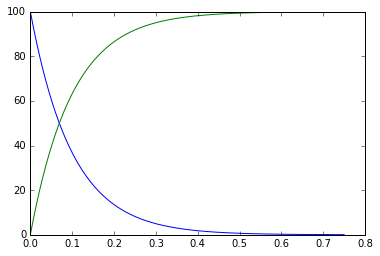

In [5]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = .75 ## In hours
currentDay = 1

def absorptionRate(caff):
    return caff * 10
def caffeineAmount(cups):
    return cups * 100
blood = 0
stomach = 0 

def coffee2(u,t):
    stom, blood = u
    dstom = -absorptionRate(stom)
    dBloodStream = absorptionRate(stom)
    return [dstom, dBloodStream]

init = [100, blood]
xs = np.linspace(0, totalTime, 900)
ys = rk4(coffee2, init, xs)
print(ys[-1])
plt.plot(xs, ys)

Above: Green = Blood,  Blue is Stomach.

This shows us that in 45 minutes (.75 hours), we see that the value of caffeine left in the system is practically 0. We can increase the absorption rate infinitely and it would still practically be 0 so we just choose 10. Anything less than 10 does not appear close enough to zero (< .1)

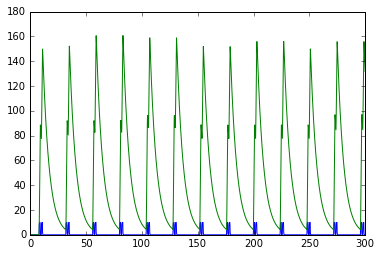

In [8]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = 300 ## In hours
currentDay = 1
cupsPerDrink = 1.6
caffeineAbs = 200/(4/6)
blood = 0
stomach = 0 
def caffeineAmount(cups):
    return cups * 100
def eightAM(t):
    if (math.floor(t) % 24 == 8):
        return caffeineAmount(1)
    if (math.floor(t) % 24 == 10):
        return caffeineAmount(1)
    return 0
def absorptionRate(caff):
    return caff * 10
def coffee2(u,t):
    stom, blood = u
    dstom = eightAM(t) - absorptionRate(stom)
    dBloodStream = absorptionRate(stom) - blood * decayR
    return [dstom, dBloodStream]

init = [stomach, blood]
xs = np.linspace(0, totalTime, 2000)
ys = rk4(coffee2, init, xs)

plt.plot(xs, ys)



Above: Green = Blood,  Blue is Stomach.

We see that the stomach barely holds any coffee before it is absorbed into the blood stream. The addition of the stomach seems to play a minimal impact into our graph. The peaks are slightly lower than the one compartment model though. There is no equilibirum found.

## Excessive Intake

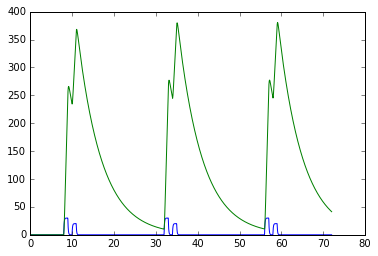

In [7]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = 72 ## In hours
currentDay = 1
cupsPerDrink = 1.6
blood = 0
stomach = 0 
def caffeineAmount(cups):
    return cups * 100
def eightAM(t):
    if (math.floor(t) % 24 == 8):
        return caffeineAmount(3)
    if (math.floor(t) % 24 == 10):
        return caffeineAmount(2)
    return 0
def absorptionRate(caff):
    return caff * 10
def coffee2(u,t):
    stom, blood = u
    dstom = eightAM(t) - absorptionRate(stom)
    dBloodStream = absorptionRate(stom) - blood * decayR
    return [dstom, dBloodStream]

init = [stomach, blood]
xs = np.linspace(0, totalTime, 2000)
ys = rk4(coffee2, init, xs)

plt.plot(xs, ys)



Above: Green = Blood,  Blue is Stomach.

This graph is very similar to the low consumption graph. No equilibrium seems to be reached in our model.

## Differences between Models

The models do not seem that different at all. From a visual perspective, the caffeine in blood stream goes up slower in the two compartment model and that leads to a lower maximum amount of caffeine in the blood stream because the decay begins before the peak of the one model compartment.

# Chocolate:

Chocolate amount = 1.28mg of caffeine in 1 g of dark chocolate. http://www.caffeineinformer.com/caffeine-content/dark-chocolate 72% Cacao Twilight Delight: 22mg/17g square or 128mg/100g or 1.28mg/1g

Let's say we eat the chocolate at around 9:00 and 11:00, thus our total output of caffeine goes up by 1.28mg * 7 = 8.96mg. So we add a total of 8.96 mg. This is basically a negligable amount. 

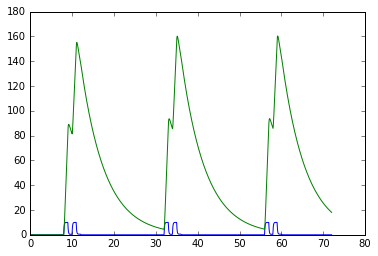

In [307]:
cafDecayRate = 4 ## in hours
decayR = 1/5.78
totalTime = 72 ## In hours
currentDay = 1
cupsPerDrink = 1.6
choc = 1.28 ## mg per 1 g
def caffeineAmount(cups):
    return cups * 100
blood = 0
stomach = 0 
def chocolateAmount(grams):
    return 1.28 * grams
def eightAM(t):
    if (math.floor(t) % 24 == 8):
        return caffeineAmount(1)
    elif (math.floor(t) % 24 == 10):
        return caffeineAmount(1)
    return 0
def chocTime(t):
    if (math.floor(t) % 24 == 9):
        return chocolateAmount(3)
    elif (math.floor(t) % 24 == 11):
        return chocolateAmount(4)
    return 0
def absorptionRate(caff):
    return caff * 10

def coffee2(u,t):
    stom, blood = u
    dstom = eightAM(t) - absorptionRate(stom) + chocTime(t)
    dBloodStream = absorptionRate(stom) - blood * decayR
    return [dstom, dBloodStream]


init = [stomach, blood]
xs = np.linspace(0, totalTime, 2000)
ys = rk4(coffee2, init, xs)

plt.plot(xs, ys)



Above: Green = Blood,  Blue is Stomach.


We can see from the graph above, if we excessively drink coffee and eat chocolate there is no major change in blood steram concentration, however, the stomach has a significant second peak. 


## Discuss the sensitivity of your models to the parameters you found through research. Back up your statements with numerical results based on altering the parameters of the original models. 
The sensitivity the half life of caffeine can vary very little because it is exponentially factored into the equation. So a small change is compounded multiple times. However, the half life of caffeine is different for each person. Another variable that we used was the absorption rate which we found graphically. Technically, this constant could be as large as infinity and still technically be correct. Thus this number can increase as much as it wants, and our graph will look similar, but it cannot go lower.

## What else did we ignore in our models? Suggest one way we could enrich the model to improve the accuracy of our results. 
We ignored tissue absorption into our models. We also ignored max and mins because we only used Averages.  